In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor

import optuna

In [46]:
train = pd.read_csv("train.csv")

print(train.shape)

(14682, 17)


In [47]:
X= train.drop(columns=['Price'])
y = train['Price'].values

[0]	validation_0-rmse:327401.56174
[1]	validation_0-rmse:323654.23976
[2]	validation_0-rmse:320031.34944
[3]	validation_0-rmse:316517.55419
[4]	validation_0-rmse:313139.71570
[5]	validation_0-rmse:309802.04390
[6]	validation_0-rmse:306593.07235
[7]	validation_0-rmse:303427.63639
[8]	validation_0-rmse:300451.51030
[9]	validation_0-rmse:297408.59382
[10]	validation_0-rmse:294444.27767
[11]	validation_0-rmse:291564.09363


[12]	validation_0-rmse:288804.44731
[13]	validation_0-rmse:286065.12673
[14]	validation_0-rmse:283381.18782
[15]	validation_0-rmse:280738.36805
[16]	validation_0-rmse:278142.13467
[17]	validation_0-rmse:275703.36375


C:\Users\alex-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\alex-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\alex-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_

[18]	validation_0-rmse:273412.22194
[19]	validation_0-rmse:271001.21261
[20]	validation_0-rmse:268631.47289
[21]	validation_0-rmse:266432.39505
[22]	validation_0-rmse:264197.93884
[23]	validation_0-rmse:261988.00222
[24]	validation_0-rmse:259902.18014
[25]	validation_0-rmse:257944.94688
[26]	validation_0-rmse:256015.24333
[27]	validation_0-rmse:254137.43452
[28]	validation_0-rmse:252354.40811
[29]	validation_0-rmse:250473.90486
[30]	validation_0-rmse:248786.81086
[31]	validation_0-rmse:247056.07160
[32]	validation_0-rmse:245426.41372
[33]	validation_0-rmse:243746.03173
[34]	validation_0-rmse:242160.05072
[35]	validation_0-rmse:240680.43559
[36]	validation_0-rmse:239229.28237
[37]	validation_0-rmse:237775.29951
[38]	validation_0-rmse:236413.50741
[39]	validation_0-rmse:235119.42842
[40]	validation_0-rmse:233678.16833
[41]	validation_0-rmse:232458.41275
[42]	validation_0-rmse:231161.29567
[43]	validation_0-rmse:229761.19889
[44]	validation_0-rmse:228525.57045
[45]	validation_0-rmse:22737

C:\Users\alex-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\alex-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\alex-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_

<Axes: title={'center': 'Feature Importance'}>

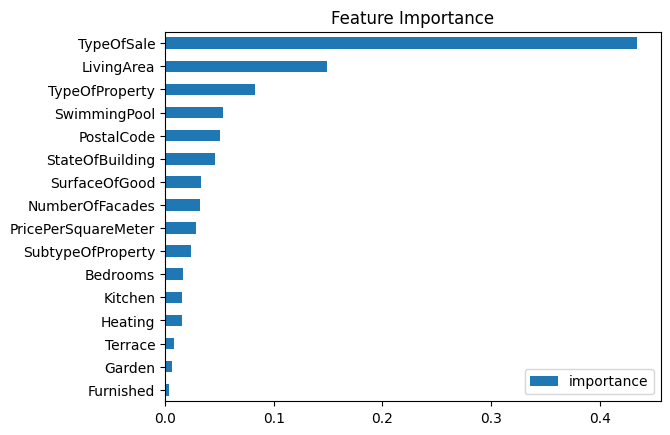

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

# model=pickle.load(open("model.pkl","rb"))

reg = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.02, n_jobs=4)
reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
predictions = reg.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R-squared (explained variance):", r2 *100, "%")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance']).sort_values(by='importance').plot(kind='barh', title='Feature Importance')

In [ ]:
def train_and_evaluate_catboost(params):
    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    return model, r2, mse

In [49]:
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model, r2, mse = train_and_evaluate_catboost(params)

    # Save the best model found by Optuna with pickle
    if r2 > study.user_attrs.get("best_r2", -1):
        with open("best_catboost_model.pkl", "wb") as model_file:
            pickle.dump(model, model_file)
        study.set_user_attr("best_r2", r2)
        study.set_user_attr("best_mse", mse)

    return mse  # Optuna minimizes the objective function, so we return MSE

# Initialize Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Retrieve the best R-squared and MSE values found during the optimization
best_r2 = study.user_attrs.get("best_r2", -1)
best_mse = study.user_attrs.get("best_mse", -1)
print("Best R-squared:", best_r2)
print("Best MSE:", best_mse)

[I 2023-10-20 15:13:02,003] A new study created in memory with name: no-name-11b5408e-57b5-4e3b-bc7a-ed0039f4140e
[I 2023-10-20 15:13:06,632] Trial 0 finished with value: 152393.67968034663 and parameters: {'learning_rate': 0.09749136046136148, 'depth': 4, 'subsample': 0.857032820886183, 'colsample_bylevel': 0.5551952079780483, 'min_data_in_leaf': 40}. Best is trial 0 with value: 152393.67968034663.
[I 2023-10-20 15:13:11,923] Trial 1 finished with value: 165728.7745040282 and parameters: {'learning_rate': 0.013380750978914793, 'depth': 7, 'subsample': 0.7704197906435793, 'colsample_bylevel': 0.17078286080968, 'min_data_in_leaf': 28}. Best is trial 0 with value: 152393.67968034663.
[I 2023-10-20 15:13:15,283] Trial 2 finished with value: 216846.01302707475 and parameters: {'learning_rate': 0.0018357818395609057, 'depth': 5, 'subsample': 0.6181772917914051, 'colsample_bylevel': 0.5239387374522947, 'min_data_in_leaf': 6}. Best is trial 0 with value: 152393.67968034663.
[I 2023-10-20 15:1